# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# base = > http://api.openweathermap.org
# path => /data/2.5/weather
# Params => units=Imperial&APPID={weather_api_key}&q=Londan

# endpoint => http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------


In [8]:
#Example to test call
city_url = url + "&q=" + 'london'
city_weather = requests.get(city_url).json()

In [22]:
city_weather
#Lists out all keys
print(city_weather.keys())
#check variables in keys
city_weather['weather']

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])


[{'id': 804,
  'main': 'Clouds',
  'description': 'overcast clouds',
  'icon': '04n'}]

In [10]:
#Curly base means dictionary
#type(city_weather) --> returns dict

dict

In [9]:
# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data (to test first, (cities[:5])
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
#dict_keys(['coord', 'weather', 'base', 'main', 
           #'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | srednekolymsk
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | sistranda
Processing Record 6 of Set 1 | pisco
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | pervomayskiy
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | nkowakowa
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | pravia
Processing Record 15 of Set 1 | sept-iles
Processing Record 16 of Set 1 | isangel
Processing Record 17 of Set 1 | kathmandu
Processing Record 18 of Set 1 | manggar
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | yumen
Processing Record 23 of Set 1 | faanui
Processing Record 24 of Set 1

Processing Record 36 of Set 4 | ayan
Processing Record 37 of Set 4 | yeppoon
Processing Record 38 of Set 4 | nioro
Processing Record 39 of Set 4 | geresk
City not found. Skipping...
Processing Record 40 of Set 4 | slavutych
Processing Record 41 of Set 4 | san miguel ixtahuacan
Processing Record 42 of Set 4 | sirjan
Processing Record 43 of Set 4 | eyrarbakki
Processing Record 44 of Set 4 | palmer
Processing Record 45 of Set 4 | gomel
Processing Record 46 of Set 4 | lebu
Processing Record 47 of Set 4 | mehamn
Processing Record 48 of Set 4 | shubarshi
Processing Record 49 of Set 4 | cherusti
Processing Record 0 of Set 5 | ginir
Processing Record 1 of Set 5 | pareora
Processing Record 2 of Set 5 | alugan
Processing Record 3 of Set 5 | hambantota
Processing Record 4 of Set 5 | dikson
Processing Record 5 of Set 5 | saint-augustin
Processing Record 6 of Set 5 | canberra
Processing Record 7 of Set 5 | airai
Processing Record 8 of Set 5 | nemuro
Processing Record 9 of Set 5 | tshela
Processing 

Processing Record 29 of Set 8 | kysyl-syr
Processing Record 30 of Set 8 | marsh harbour
Processing Record 31 of Set 8 | mogocha
Processing Record 32 of Set 8 | berlevag
Processing Record 33 of Set 8 | abiy adi
City not found. Skipping...
Processing Record 34 of Set 8 | leshukonskoye
Processing Record 35 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 36 of Set 8 | tiksi
Processing Record 37 of Set 8 | mukhen
Processing Record 38 of Set 8 | terrace
Processing Record 39 of Set 8 | boddam
Processing Record 40 of Set 8 | atasu
Processing Record 41 of Set 8 | caravelas
Processing Record 42 of Set 8 | neftcala
Processing Record 43 of Set 8 | kharitonovo
Processing Record 44 of Set 8 | williamsport
Processing Record 45 of Set 8 | brownsville
Processing Record 46 of Set 8 | oksfjord
Processing Record 47 of Set 8 | hluk
Processing Record 48 of Set 8 | mbanza-ngungu
Processing Record 49 of Set 8 | puerto leguizamo
Processing Record 0 of Set 9 | raudeberg
Processing Record 1 of 

Processing Record 19 of Set 12 | ballstad
City not found. Skipping...
Processing Record 20 of Set 12 | inirida
Processing Record 21 of Set 12 | buraydah
Processing Record 22 of Set 12 | mvuma
Processing Record 23 of Set 12 | tabas
Processing Record 24 of Set 12 | varhaug
Processing Record 25 of Set 12 | new ulm
Processing Record 26 of Set 12 | kihei
Processing Record 27 of Set 12 | nur
Processing Record 28 of Set 12 | gubkinskiy
Processing Record 29 of Set 12 | vitim
Processing Record 30 of Set 12 | haines junction
Processing Record 31 of Set 12 | rio hato
Processing Record 32 of Set 12 | hopewell
Processing Record 33 of Set 12 | brownwood
Processing Record 34 of Set 12 | long xuyen
Processing Record 35 of Set 12 | trofors
Processing Record 36 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 37 of Set 12 | harper
Processing Record 38 of Set 12 | joshimath
Processing Record 39 of Set 12 | sorong
Processing Record 40 of Set 12 | caborca
Processing Record 41 of Set 12 

In [28]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame (city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64


In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,srednekolymsk,67.4500,153.6833,-44.43,99,48,5.77,RU,1671039686
1,yellowknife,62.4560,-114.3525,7.32,85,40,14.97,CA,1671039687
2,atuona,-9.8000,-139.0333,77.49,79,63,16.17,PF,1671039687
3,sistranda,63.7256,8.8340,21.16,58,100,23.62,NO,1671039687
4,pisco,-13.7000,-76.2167,73.45,73,0,11.50,PE,1671039688


In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

print("Successful export")

Successful export


In [34]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,srednekolymsk,67.4500,153.6833,-44.43,99,48,5.77,RU,1671039686
1,yellowknife,62.4560,-114.3525,7.32,85,40,14.97,CA,1671039687
2,atuona,-9.8000,-139.0333,77.49,79,63,16.17,PF,1671039687
3,sistranda,63.7256,8.8340,21.16,58,100,23.62,NO,1671039687
4,pisco,-13.7000,-76.2167,73.45,73,0,11.50,PE,1671039688


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

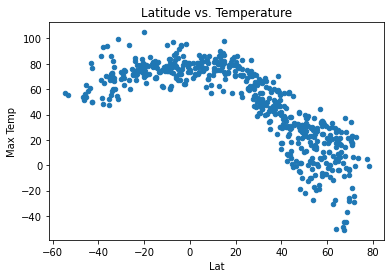

In [40]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter (x= "Lat", y= "Max Temp", title = 'Latitude vs. Temperature')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

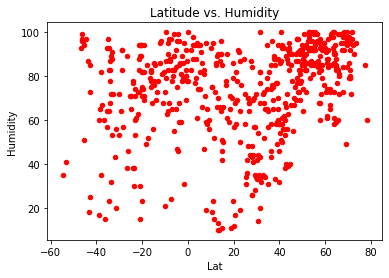

In [41]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter (x= "Lat", y= "Humidity", title = 'Latitude vs. Humidity', c = 'r')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

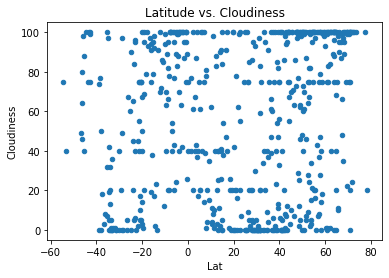

In [42]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter (x= "Lat", y= "Cloudiness", title = 'Latitude vs. Cloudiness')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

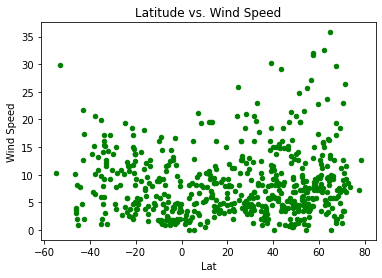

In [43]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter (x= "Lat", y= "Wind Speed", title = 'Latitude vs. Wind Speed', c = 'g')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [76]:
# Define a function to create Linear Regression plots

def linear_reg_plot_generator (x_values, y_values, slope, intercept, rvalue, regress_values):
    #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    return (plt.plot(x_values,regress_values,rvalue))
    return (plt.scatter(x_values,y_values))
    return plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")



In [68]:
#Must calculate separately and store values:
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept

#ex.
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

#(slope, intercept, rvalue, pvalue, stderr) = 
lat_v_hum = linregress(x_values, y_values)
lat_v_hum 

slope_h = lat_v_hum[0]
intercept_h = lat_v_hum[1]
r_value_h = lat_v_hum[2]

regress_values_h = x_values*slope_h + intercept_h






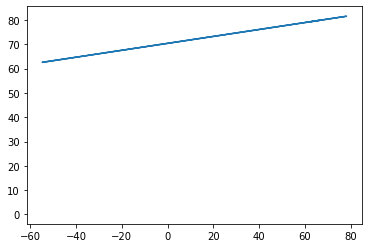

In [77]:
linear_reg_plot_generator(city_data_df["Lat"], city_data_df["Humidity"], slope_h, intercept_h, r_value_h, regress_values_h)

In [ ]:
# Add the linear regression equation and line to plot
x_values = san_diego_housing['AveRooms']
y_values = san_diego_housing['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($100,000)')
plt.show()

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE